In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import *
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec

<h1> Diffraction using angular spectrum </h1>

For electric field $E(x,y,z)$ we have the 2D Fourier transform, or angular specrum representation, 

$$    \mathbf{E}(x,y,z) = \iint\limits_{-\infty}^{\infty} \hat{\mathbf{E}}(k_x,k_y;z)e^{i\left[k_x x + k_y y\right]} \,d k_x\,d k_y.$$ 

Consider a single field component, say $\mathrm{E}_x$, using the Helmholtz equation we know that $(\nabla^2 + k^2)~\mathrm{E}_x(x,y,z) = 0$. We know that the Fourier representation of the field should also be a solution to the Helmholtz equation. Therefore we apply the Helmholtz operator $(\nabla^2 + k^2)$ onto the Fourier representation and obtain,

$$\frac{d^2}{d z^2}  \hat{\mathbf{E}}(k_x,k_y;z)=-\left[k^2-\left(k_x^2+k_y^2\right)\right] \hat{\mathbf{E}}(k_x,k_y;z).$$

Since the integrand in the resultant Fourier expansion to zero (the integral is identically zero for all x and y). We define $k_z\equiv+\sqrt{k^2 - \left(k_x^2+k_y^2\right)},$ 

and have a solution given by, $$\hat{\mathbf{E}}(k_x,k_y;z)=A\left(k_x, k_y\right) \exp (i k_z z)+B\left(k_x, k_y\right) \exp (-i k_z z).$$

At $z=0$ we observe that $\hat{\mathbf{E}}(k_x,k_y;z)=A\left(k_x, k_y\right)+B\left(k_x, k_y\right)$. 

Also note that for $k^2 \geq 4 \pi^2\left(k_x^2+k_y^2\right), k_z \in \mathbb{R}$ and that when $k^2<4 \pi^2\left(k_x^2+k_y^2\right), k_z \in \mathbb{C}.$ We then conclude that to obtain physical solutions of $\hat{\mathbf{E}}\left(k_x, k_y ; z\right)$ for $z\to\infty$ we set $B\left(k_x,k_y\right) = 0$ and have,

$$A\left(k_x, k_y\right)=\tilde{E}_x\left(k_x, k_y ; 0\right).$$

We now have that $$\hat{\mathbf{E}}\left(k_x, k_y ; z\right)=\hat{\mathbf{E}}\left(k_x, k_y ; 0\right) \exp (i k_z z).$$

The key result then becomes, $$\mathbf{E}(x, y, z)=\iint\limits_{-\infty}^{\infty} d k_x d k_y \hat{\mathbf{E}}\left(k_x, k_y ; 0\right) \exp (ik_z z) \exp \left[\left(k_x x+k_y y\right)\right].$$ 

Simply, we have that from the 2D fourier transform of the field at some inital plane defined as $z=0$, we can compute the field at any plane $z=const.$ by simply propegating by a factor $\exp[ik_zz]$. We do this by implementing the code below.

<!-- Moving forward, to simulate this field we need to discritise computational domain. To do so we define a region $\left(x^{\prime}, y^{\prime}\right) \in\left[-L_x, L_x\right] \times\left[-L_y, L_y\right]$ and define a resultion of this domain in $x$ and $y$ as $N_x, N_y$ respectively. This discretised space can be writen as,
$$
\begin{aligned}
& x_{s_x}^{\prime}=\left\{-L_x+s_x \frac{2 L_x}{N_x}: 0 \leq s_x \leq N_x-1\right\}, \\
& y_{s_y}^{\prime}=\left\{-L_y+s_y \frac{2 L_y}{N_y}: 0 \leq s_y \leq N_y-1\right\}.
\end{aligned}
$$
The Discrete Fourier Transform is then computed using the Fast Fourier Transform $$c\left(n_x, n_y\right)=\sum_{s_x=0}^{N_x-1} \sum_{s_y=0}^{N_y-1} E\left(x_{s_x}^{\prime}, y_{s_y}^{\prime}, 0\right) e^{-i \frac{s_x}{N_x} n_x} e^{-i \frac{s_y}{N_y} n_y}$$ -->


<h1> Plane Wave </h1>

Text(0.5, 0, 'Distance from Lens [$z/\\lambda$]')

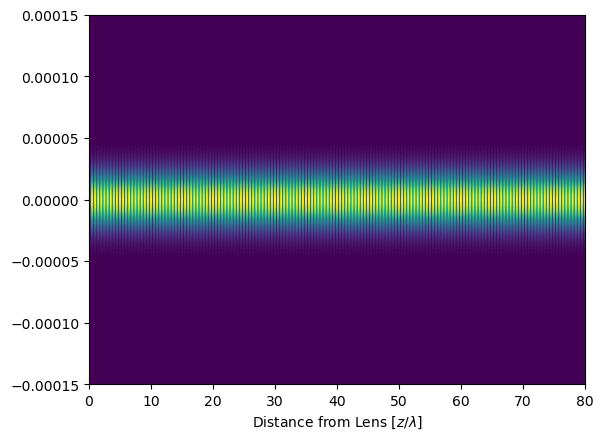

In [2]:
nm = 1e-9 
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set Max distance to propagate 
zMax = 80*λ
## Set number of planes along propagation axis per wavelength
resZ = 20

## Set Size of Intial E-Field in transverse direction
Lx = 300*um
resX = Lx/500

## Defining Computation Space
z = np.arange(0,zMax+λ/resZ,λ/resZ)
x = np.arange(-Lx/2,Lx/2+resX,resX)
X,Z = np.meshgrid(x,z)


## Compute Kz 
kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(fftfreq(len(x),np.diff(x)[0]))**2,dtype='cfloat'))


## Phase
ϕ_x = 0

## Amplitude(x) at z=0
w = 30*um
Gauss = 1*np.exp(-x**2/w**2)
## Build the Initial E-Field at z=0
f = np.array(Gauss*np.exp(1j*(-ϕ_x)),dtype='cfloat')

## Build the E-field Array
Efield = np.zeros((len(z),len(x)),dtype='cfloat')
## Compute
for i in range(len(z)):
    Efield[i] = ifft(fft(f) * np.exp(1j*kz*z[i]))

# Plot
fig, ax = plt.subplots()
ax.contourf(Z/λ,X,np.abs(np.real(Efield))**2, levels = 80)
ax.set_xlabel(r'Distance from Lens [$z/\lambda$]')

Text(0.5, 0, 'x-coord [$\\mu$m]')

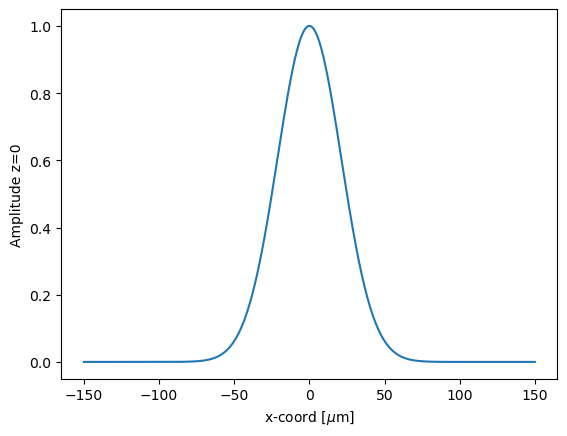

In [3]:
fig, ax1 = plt.subplots()
ax1.plot(x*1e6,Gauss)
ax1.set_ylabel('Amplitude z=0')
ax1.set_xlabel(r'x-coord [$\mu$m]')

<h1> Plane Wave shifted </h1>
<br>

Generalised Snell's Law

$$n_t\sin\left(\theta_t\right) - n_i\sin\left(\theta_i\right) = \frac{\lambda}{2\pi}\frac{d\Phi}{dx}$$
Where $n_t$ and $n_i$ are the refracted index in the refracted and inital regions respectively, $\theta_t$ and $\theta_i$ is the angle of the plane wave w.r.t the interface in the refracted and initial regions respectively, and $\frac{d\Phi}{dx}$ is the gradient of the phase discontinuity along the interface. We set $n_i = n_t = 1$ and $\theta_i = 0$ and obtain, 
$$ \theta_t = \arcsin\left(\frac{\lambda}{2\pi}\frac{d\Phi}{dx}\right)$$


<br>
<font size="-2">
N. Yu et al., ‘Light Propagation with Phase Discontinuities: Generalized Laws of Reflection and Refraction’, Science, vol. 334, no. 6054, pp. 333–337, Oct. 2011, doi: 10.1126/science.1210713.
<br>
P. Genevet, F. Capasso, F. Aieta, M. Khorasaninejad, and R. Devlin, ‘Recent advances in planar optics: from plasmonic to dielectric metasurfaces’, Optica, vol. 4, no. 1, p. 139, Jan. 2017, doi: 10.1364/OPTI.4.000139.
</font>

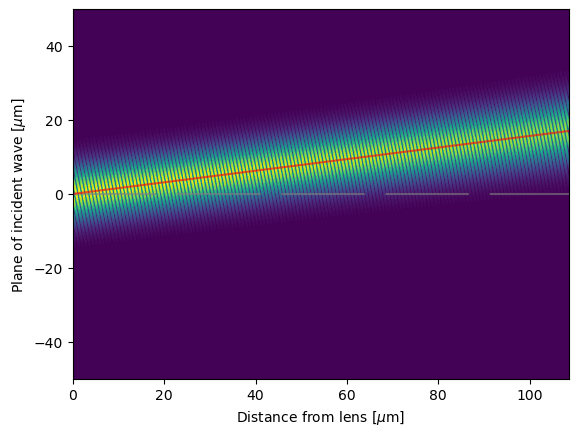

In [4]:
nm = 1e-9
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set Max distance to propagate 
zMax = 70*λ
## Set number of planes along propagation axis per wavelength
resZ = 10

## Set Size of Intial E-Field in transverse direction
Lx = 100*um
resX = Lx/500

## Defining Computation Space
z = np.arange(0,zMax+λ/resZ,λ/resZ)
x = np.arange(-Lx/2,Lx/2+resX,resX)
X,Z = np.meshgrid(x,z)


## Compute Kz 
# kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(fftfreq(len(x),np.diff(x)[0]))**2,dtype='cfloat'))


####### OLD Kz Computation to compare ######
kz = k**2 - 4*np.pi**2*(fftfreq(len(x),np.diff(x)[0]))**2
kz = np.sqrt(np.where(kz>0, kz, 0))
############################################

## Phase
grad = 10*(2*np.pi/Lx)
ϕ_x = grad*x


## Amplitude(x) at z=0
w = 10*um
Gauss = 1*np.exp(-x**2/w**2)
## Build the Initial E-Field at z=0
f = Gauss*np.exp(1j*(ϕ_x))

## Build the E-field Array
Efield = np.zeros((len(z),len(x)),dtype='cfloat')
## Compute
for i in range(len(z)):
    Efield[i] = ifft(fft(f) * np.exp(1j*kz*z[i]))


# Plot
fig, ax = plt.subplots()
ax.contourf(Z*1e6,X*1e6,np.real(Efield)**2, levels = 80)
ax.set_xlabel(r'Distance from lens [$\mu$m]')
ax.set_ylabel(r'Plane of incident wave [$\mu$m]')

ax.axhline(0,color= 'grey', alpha= 0.6, linestyle=(0,(40,10)))
ax.axline((0,0),(zMax*1e6,zMax*1e6*np.tan(np.arcsin(grad/k))),color='red',alpha=0.6)

# ax.set_ylim(-10,10)

Text(0, 0.5, 'Initial phase at z=0')

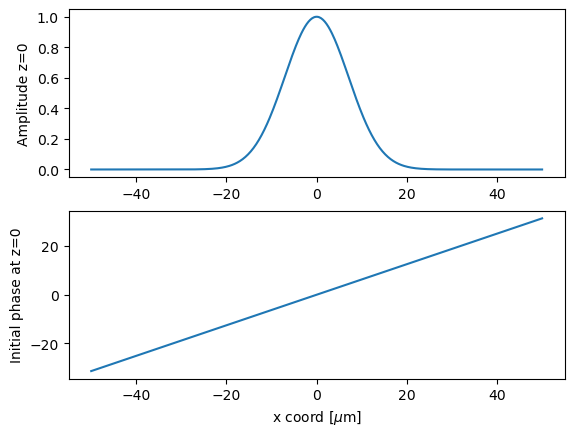

In [5]:
fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(x*1e6,Gauss)
ax1.set_ylabel('Amplitude z=0')

ax2.plot(x*1e6,ϕ_x)
ax2.set_xlabel(r'x coord [$\mu$m]')
ax2.set_ylabel('Initial phase at z=0')

C:\MQU\SCI\Anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


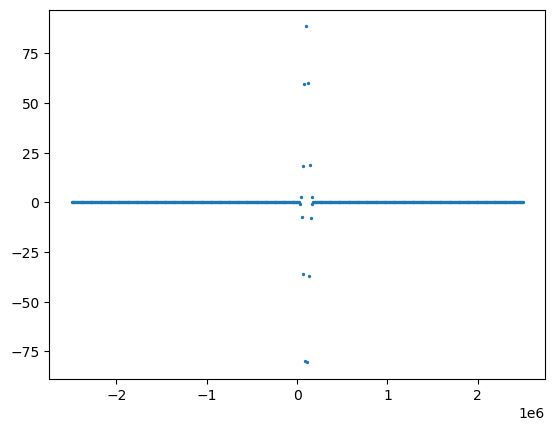

In [6]:
fig, ax = plt.subplots()

ax.scatter(fftfreq(len(x),np.diff(x)[0]),fft(f),s=2)
# ax.set_xlim(-2.5,2.5)

<h1> Stepped phase (Metasurface Approx) </h1>
Appoximate the metasurface by digitising the phase profile in specific step widths (nanoparticel sizes)

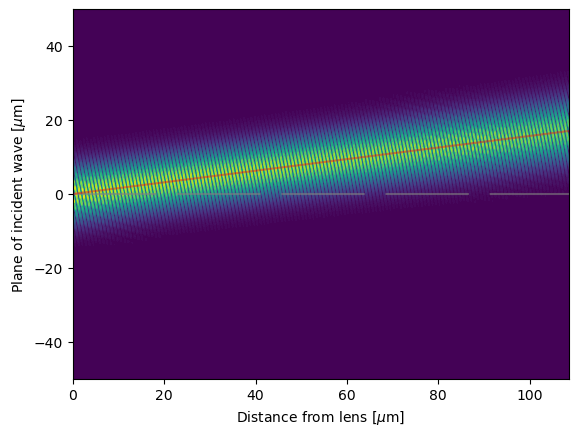

In [7]:
nm = 1e-9
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set Max distance to propagate 
zMax = 70*λ
## Set number of planes along propagation axis per wavelength
resZ = 10

## Set Size of Intial E-Field in transverse direction
Lx = 100*um
resX = Lx/500

## Defining Computation Space
z = np.arange(0,zMax+λ/resZ,λ/resZ)
x = np.arange(-Lx/2,Lx/2+resX,resX)
X,Z = np.meshgrid(x,z)


# ###### OLD Kz Computation to compare ######
# kz = k**2 - 4*np.pi**2*(fftfreq(len(x),np.diff(x)[0]))**2
# kz = np.sqrt(np.where(kz>0, kz, 0))
# ###########################################


## Compute Kz 
kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(fftfreq(len(x),np.diff(x)[0]))**2,dtype='cfloat'))





## Stepped Phase Profile
# Choose width of step (~nanoparticle)
Δ = 900*nm
# Specify the phase discontinity gradient
grad = 10*(2*np.pi/Lx)
# Build discretised phase profile
ϕ_x = grad*Δ*np.floor((x+Δ/2)/Δ)



## Amplitude(x) at z=0
w = 10*um
Gauss = 1*np.exp(-x**2/w**2)
## Build the Initial E-Field at z=0
f = Gauss*np.exp(1j*(ϕ_x))

## Build the E-field Array
Efield = np.zeros((len(z),len(x)),dtype='cfloat')
## Compute
for i in range(len(z)):
    Efield[i] = ifft(fft(f) * np.exp(1j*kz*z[i]))


# Plot
fig, ax = plt.subplots()
ax.contourf(Z*1e6,X*1e6,np.real(Efield)**2, levels = 80)
ax.set_xlabel(r'Distance from lens [$\mu$m]')
ax.set_ylabel(r'Plane of incident wave [$\mu$m]')

ax.axhline(0,color= 'grey', alpha= 0.6, linestyle=(0,(40,10)))
ax.axline((0,0),(zMax*1e6,zMax*1e6*np.tan(np.arcsin(grad/k))),color='red',alpha=0.4)

# ax.set_ylim(-10,10)


Text(0, 0.5, 'Initial phase at z=0')

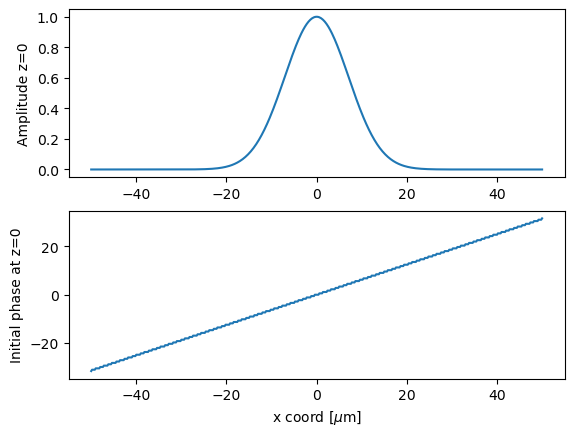

In [8]:
fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(x*1e6,Gauss)
ax1.set_ylabel('Amplitude z=0')

ax2.plot(x*1e6,ϕ_x)
ax2.set_xlabel(r'x coord [$\mu$m]')
ax2.set_ylabel('Initial phase at z=0')


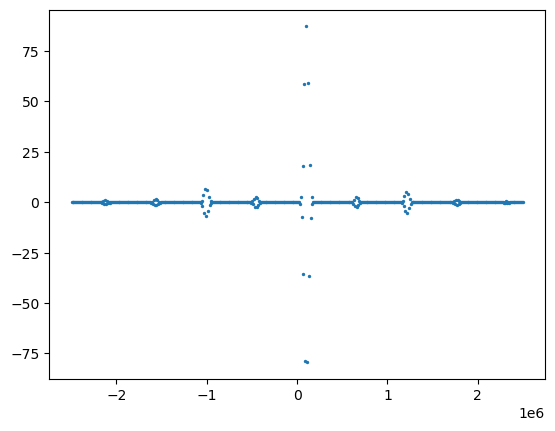

In [9]:
fig, ax = plt.subplots()

ax.scatter(fftfreq(len(x),np.diff(x)[0]),fft(f),s=2)
# ax.set_xlim(-2.5,2.5)

<h1> Spherical Lens - 1D </h1>

Target phase profile for the initial electric field;

$ \phi(x) = \sqrt{x^2 + f^2} - f \mathrm{, }\quad f\mathrm{~=~focal~length}$


In [10]:
nm = 1e-9
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set Max distance to propagate 
zMax = 70*λ
## Set number of planes along propagation axis per wavelength
resZ = 30

## Set Size of Intial E-Field in transverse direction
Lx = 1000*um

resX = Lx/9000

## Defining Computation Space
z = np.arange(0,zMax+λ/resZ,λ/resZ)
x = np.arange(-Lx/2,Lx/2+resX,resX)
X,Z = np.meshgrid(x,z)



## Compute Kz 
kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(fftfreq(len(x),np.diff(x)[0]))**2,dtype='cfloat'))


## Define Focal Length
F = 20*λ
## Phase
ϕ_x = k*(np.sqrt(x**2 + F**2) - F)

## Amplitude(x) at z=0
w = 10000*um
Gauss = 1*np.exp(-x**2/w**2)
## Build the Initial E-Field at z=0
f = np.array(Gauss*np.exp(1j*(-ϕ_x)),dtype='cfloat')

## Build the E-field Array
Efield = np.zeros((len(z),len(x)),dtype='cfloat')
## Compute
for i in range(len(z)):
    Efield[i] = ifft(fft(f) * np.exp(1j*kz*z[i]))
    

Text(0.5, 0, 'Spatial Freqs')

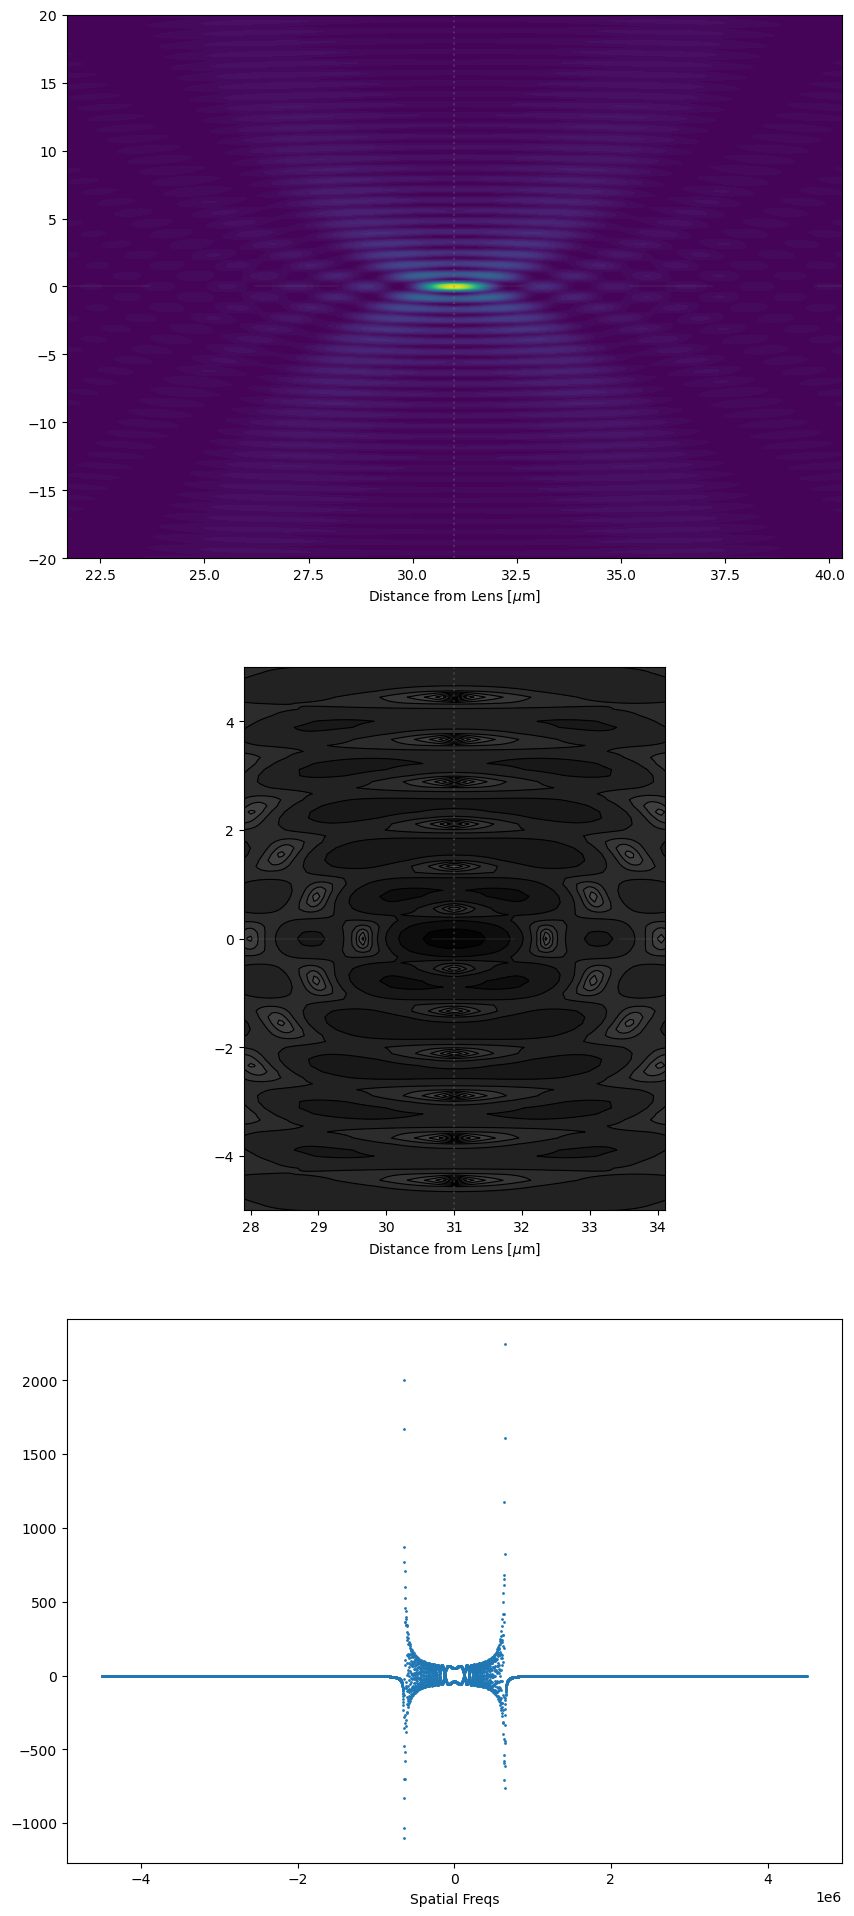

In [11]:
# Plot 
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,24))
ax1.contourf(Z*1e6,X*1e6,np.abs(Efield)**2, levels = 60)
ax1.set_xlabel(r'Distance from Lens [$\mu$m]')
ax1.axvline(F*1e6,linestyle=':',color='grey',alpha=0.3)
ax1.axhline(0,linestyle=(0,(40,50)),color='grey',alpha=0.1)
ax1.set_xlim(F*0.7*1e6,F*1.3*1e6)
ax1.set_ylim(-20,20)



ax2.contourf(Z/λ,X,np.abs(Efield)**2, levels = 60)
ax2.set_aspect(0.8)
ax2.contourf(Z*1e6,X*1e6,np.log10(np.abs(Efield)**2),30, cmap = cm.binary)
ax2.contour(Z*1e6,X*1e6,np.log10(np.abs(Efield)**2), 30, colors='black', linewidths=0.8, linestyles='solid')
ax2.set_xlabel(r'Distance from Lens [$\mu$m]')
ax2.axvline(F*1e6,linestyle=':',color='grey',alpha=0.3)
ax2.axhline(0,linestyle=(0,(40,50)),color='grey',alpha=0.1)
fact = 1/4
ax2.set_xlim(F*0.9*1e6,F*1.1*1e6)
ax2.set_ylim(-5,5)

ax3.scatter(fftfreq(len(x),np.diff(x)[0]),fft(f),s=1)
ax3.set_xlabel('Spatial Freqs')



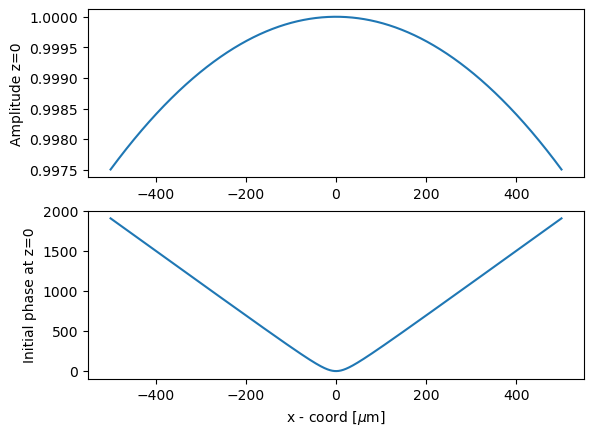

In [12]:
fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(x*1e6,Gauss)
ax1.set_ylabel('Amplitude z=0')

ax2.plot(x*1e6,ϕ_x)
ax2.set_xlabel('x - coord [$\mu$m]')
ax2.set_ylabel('Initial phase at z=0');

<h1> Stepped phase (Metelens) </h1>

In [13]:
nm = 1e-9
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set Max distance to propagate 
zMax = 70*λ
## Set number of planes along propagation axis per wavelength
resZ = 30

## Set Size of Intial E-Field in transverse direction
Lx = 1000*um

resX = Lx/9000

## Defining Computation Space
z = np.arange(0,zMax+λ/resZ,λ/resZ)
x = np.arange(-Lx/2,Lx/2+resX,resX)
X,Z = np.meshgrid(x,z)



## Compute Kz 
kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(fftfreq(len(x),np.diff(x)[0]))**2,dtype='cfloat'))


## Define Focal Length
F = 20*λ



## Stepped Phase Profile
# Choose width of step
Δ = 1.5*um
# Build discretised phase profile
ϕ_x_D = k*(np.sqrt((Δ*np.floor((x+Δ/2)/Δ))**2 + F**2) - F)
ϕ_x = k*(np.sqrt(x**2 + F**2) - F)




## Amplitude(x) at z=0
w = 600*um
Gauss = 1*np.exp(-x**2/w**2)
## Build the Initial E-Field at z=0
f = np.array(Gauss*np.exp(1j*(-ϕ_x_D)),dtype='cfloat')

## Build the E-field Array
Efield = np.zeros((len(z),len(x)),dtype='cfloat')
## Compute
for i in range(len(z)):
    Efield[i] = ifft(fft(f) * np.exp(1j*kz*z[i]))

Text(0.5, 0, 'Spatial Freqs')

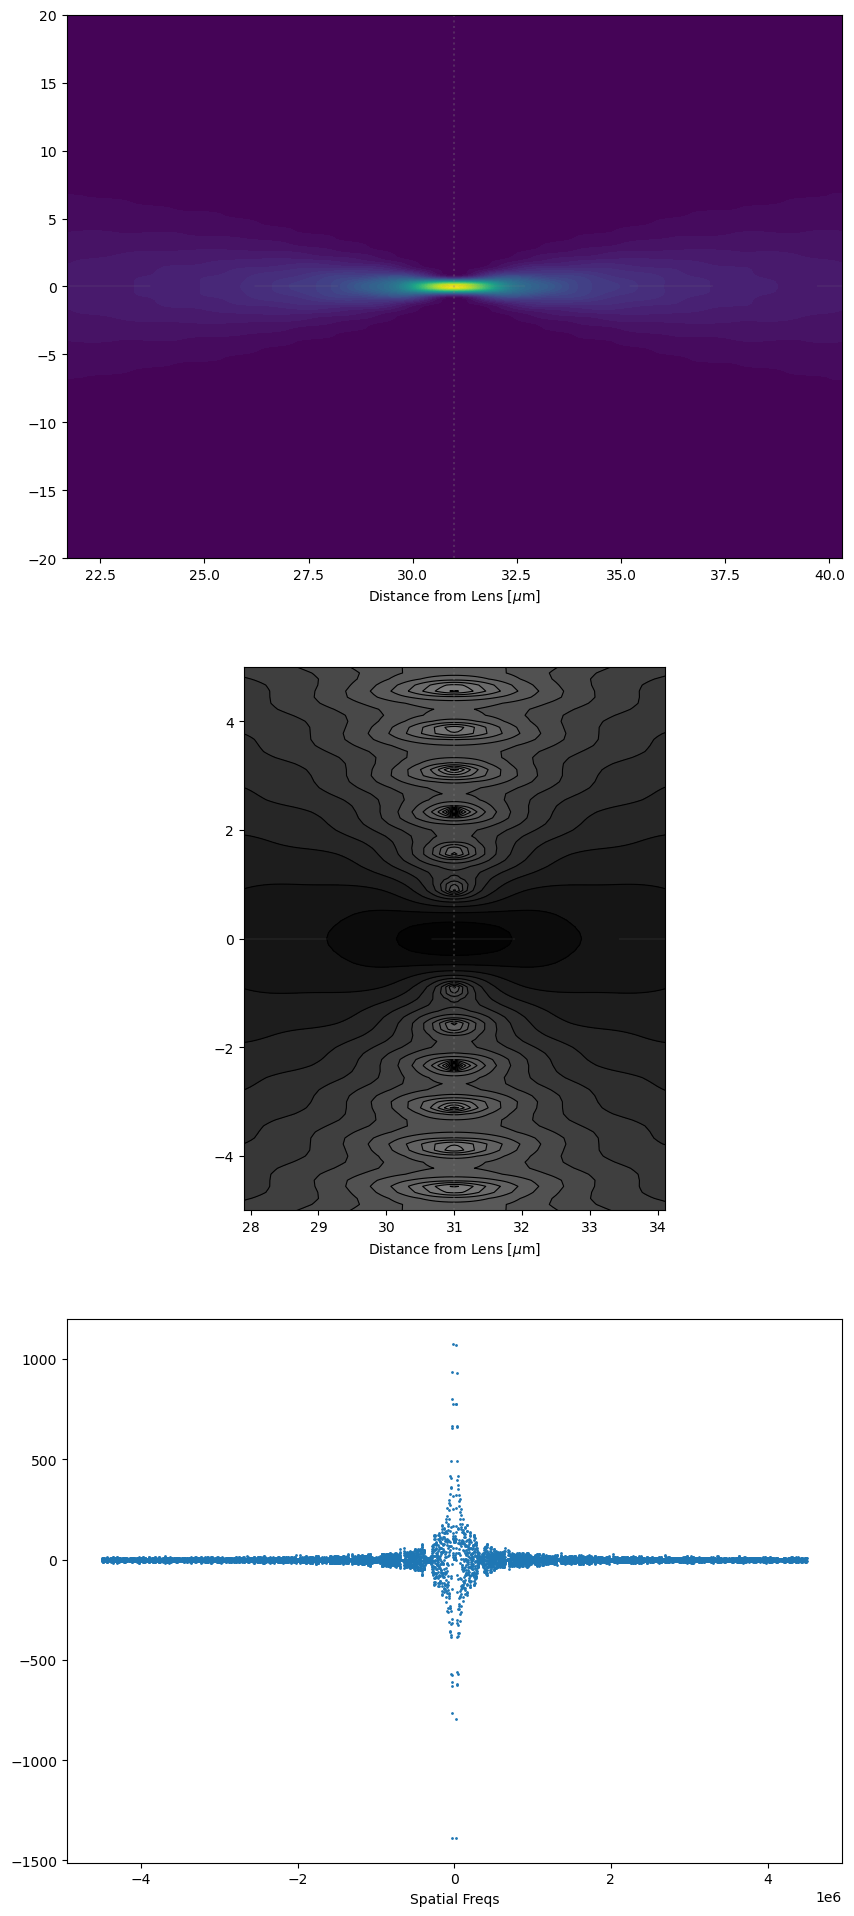

In [14]:
# Plot 
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,24))
ax1.contourf(Z*1e6,X*1e6,np.abs(Efield)**2, levels = 60)
ax1.set_xlabel(r'Distance from Lens [$\mu$m]')
ax1.axvline(F*1e6,linestyle=':',color='grey',alpha=0.3)
ax1.axhline(0,linestyle=(0,(40,50)),color='grey',alpha=0.1)
ax1.set_xlim(F*0.7*1e6,F*1.3*1e6)
ax1.set_ylim(-20,20)



ax2.contourf(Z/λ,X,np.abs(Efield)**2, levels = 60)
ax2.set_aspect(0.8)
ax2.contourf(Z*1e6,X*1e6,np.log10(np.abs(Efield)**2),30, cmap = cm.binary)
ax2.contour(Z*1e6,X*1e6,np.log10(np.abs(Efield)**2), 30, colors='black', linewidths=0.8, linestyles='solid')
ax2.set_xlabel(r'Distance from Lens [$\mu$m]')
ax2.axvline(F*1e6,linestyle=':',color='grey',alpha=0.3)
ax2.axhline(0,linestyle=(0,(40,50)),color='grey',alpha=0.1)
fact = 1/4
ax2.set_xlim(F*0.9*1e6,F*1.1*1e6)
ax2.set_ylim(-5,5)

ax3.scatter(fftfreq(len(x),np.diff(x)[0]),fft(f),s=1)
ax3.set_xlabel('Spatial Freqs')


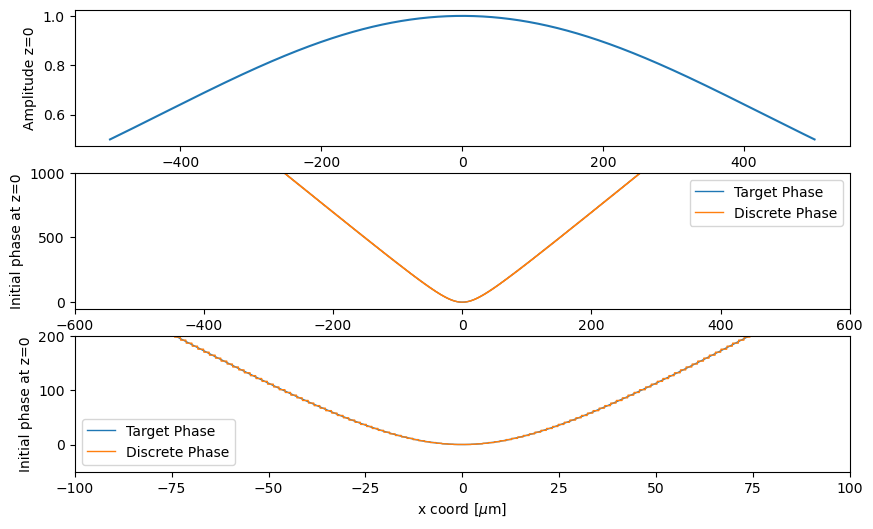

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,6))
ax1.plot(x*1e6,Gauss)
ax1.set_ylabel('Amplitude z=0')

ax2.plot(x*1e6,ϕ_x,label='Target Phase',linewidth=1)
ax2.plot(x*1e6,ϕ_x_D,label='Discrete Phase',linewidth=1)
ax2.set_xlim(-w*1e6,w*1e6)
ax2.set_ylim(-50,1000)
ax2.set_xlabel(r'x coord [$\mu$m]')
ax2.set_ylabel('Initial phase at z=0')
ax2.legend()

ax3.plot(x*1e6,ϕ_x,label='Target Phase',linewidth=1)
ax3.plot(x*1e6,ϕ_x_D,label='Discrete Phase',linewidth=1)
ax3.set_xlim(-100,100)
ax3.set_ylim(-50,200)
ax3.set_xlabel(r'x coord [$\mu$m]')
ax3.set_ylabel('Initial phase at z=0')
ax3.legend()

<h1> 2D Spherical Lens</h1>
<br>
$ \phi(x,y) = \sqrt{x^2 +y^2 + f^2} - f \mathrm{, }\quad f\mathrm{~=~focal~length}$
<h2> At a single plane </h2>

In [16]:
nm = 1e-9
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set size of computational domain E-Field 
# Size in x
Lx = 1000*um
# Size in y
Ly = 1000*um


## Set resolution of computational domain
# resolution in x
resX = Lx/12000
# resolution in y
resY = Ly/12000


## Defining Computation Space
x = np.arange(-Lx/2,Lx/2+resX,resX)
y = np.arange(-Ly/2,Ly/2+resY,resY)

X,Y = np.meshgrid(x,y)

## Find Kx and Ky
kx = fftfreq(len(x), np.diff(x)[0])
ky = fftfreq(len(x), np.diff(y)[0])

# Create grids of frequencies
kX, kY = np.meshgrid(kx, ky, indexing='ij')

# Calculate kz
kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(kX**2 + kY**2),dtype='cfloat'))



## Define Focal Length
F = 10*λ
## Phase
ϕ_xy = k*(np.sqrt(X**2 + Y**2 + F**2) - F)

## Amplitude(x) at z=0
w = 100*um
Gauss = 1*np.exp(-(X**2 + Y**2)/w**2)

## Build the Initial E-Field at z=0
f = np.array(Gauss*np.exp(1j*(-ϕ_xy)),dtype='cfloat')

## Propogate field to z = Focal Length
Efield = ifft2(fft2(f) * np.exp(1j*kz*F))

Text(0.5, 1.05, '$|\\mathrm{E(x,y,z=f)}|^2~$')

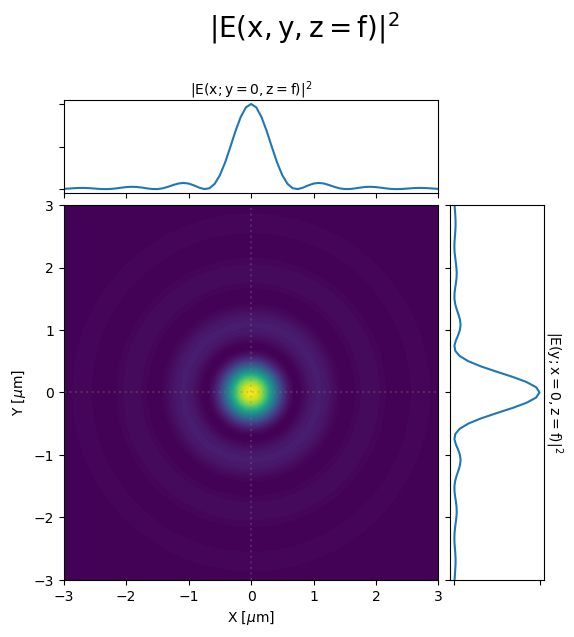

In [17]:
# Plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
xlim = 3  # [um]
ylim = 3  # [um]

# Contourf plot
ax_contourf = fig.add_subplot(gs[1, 0])
x_0 = int(len(X)/2)
y_0 = int(len(Y)/2)
extent = [-xlim, xlim, -ylim, ylim]  # Set the extent based on xlim and ylim
ax_contourf.contourf(X*1e6, Y*1e6, np.abs(Efield)**2/np.max(np.abs(Efield)**2), levels=100, extent=extent)
ax_contourf.set_xlabel('X [$\mu$m]')
ax_contourf.set_ylabel('Y [$\mu$m]')
ax_contourf.set_aspect(1)
# ax_contourf.set_title('E(x,y;z = f)')
ax_contourf.axhline(Lx/len(X)*x_0, linestyle=':', color='grey', alpha=0.3)
ax_contourf.axvline(Ly/len(Y)*y_0, linestyle=':', color='grey', alpha=0.3)
ax_contourf.set_xlim(-xlim, xlim)
ax_contourf.set_ylim(-ylim, ylim)

# Plot of field along x-axis
ax_x_field = fig.add_subplot(gs[0,0], sharex=ax_contourf)
X_cut = X[x_0, :]
E_cut_x = Efield[x_0]
ax_x_field.plot(X_cut*1e6, np.abs(E_cut_x)**2/np.max(np.abs(Efield)**2))
ax_x_field.set_xlabel('$|\mathrm{E(x;y=0,z=f)}|^2~$')
# ax_x_field.set_title('$|\mathrm{E(x;y=0,z=f)}|^2~$')
ax_x_field.set_xlim(-xlim, xlim)
# ax_x_field.axis('off')
ax_x_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_x_field.xaxis.set_label_position("top")


# Plot of field along y-axis
ax_y_field = fig.add_subplot(gs[1,1], sharey=ax_contourf)
Y_cut = Y[:, y_0]
E_cut_y = Efield[:, y_0]
ax_y_field.plot(np.abs(E_cut_y)**2/np.max(np.abs(Efield)**2), Y_cut*1e6)
ax_y_field.set_ylabel('$|\mathrm{E(y;x=0,z=f)}|^2~$',rotation=-90, labelpad=15)
# ax_y_field.set_title('$|\mathrm{E(y;x=0,z=f)}|^2~$')
ax_y_field.set_ylim(-ylim, ylim)
ax_y_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_y_field.yaxis.set_label_position("right")


plt.suptitle('$|\mathrm{E(x,y,z=f)}|^2~$',fontsize=20, y=1.05)



Text(0.5, 0.92, '$|\\mathrm{E(x,y;z = f)}|^2~$')

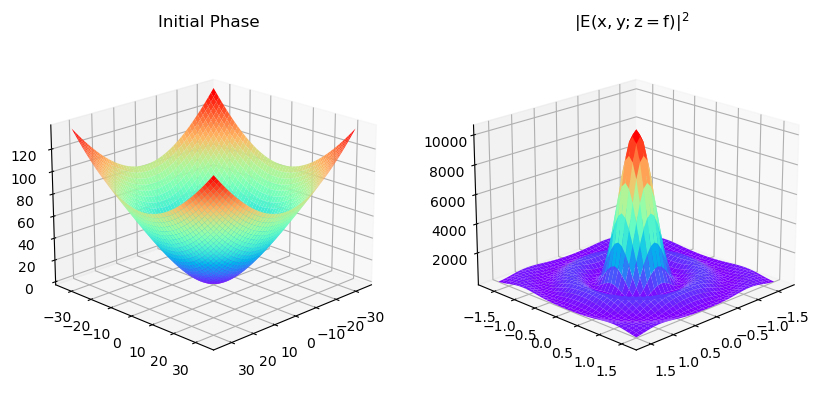

In [18]:
fig, axs = plt.subplots(1,2,subplot_kw={"projection": "3d"}, figsize = (10,15))

cut = 20
x_l, x_h = int(len(X)/2-cut), int(len(X)/2+cut)
y_l, y_h = int(len(Y)/2-cut), int(len(Y)/2+cut)
X_cut = X[x_l:x_h,x_l:x_h]
Y_cut = Y[y_l:y_h,y_l:y_h]
E_cut = Efield[x_l:x_h,y_l:y_h]

cut2 = 400
x_l2, x_h2 = int(len(X)/2-cut2), int(len(X)/2+cut2)
y_l2, y_h2 = int(len(Y)/2-cut2), int(len(Y)/2+cut2)
X_cut2 = X[x_l2:x_h2,x_l2:x_h2]
Y_cut2 = Y[y_l2:y_h2,y_l2:y_h2]
ϕ_xy_cut = ϕ_xy[x_l2:x_h2,y_l2:y_h2]



axs[0].view_init(azim=45, elev=20)
# surf = axs[0].plot_surface(X*1e6,Y*1e6,ϕ_xy,antialiased=True,linewidth=0 ,cmap=cm.rainbow)
surf = axs[0].plot_surface(X_cut2*1e6,Y_cut2*1e6,ϕ_xy_cut,antialiased=True,linewidth=0 ,cmap=cm.rainbow)

axs[1].view_init(azim=45, elev=20)


surf = axs[1].plot_surface(X_cut*1e6,Y_cut*1e6,np.abs(E_cut)**2,antialiased=True,linewidth=0 ,cmap=cm.rainbow)


axs[0].set_title('Initial Phase')
axs[1].set_title('$|\mathrm{E(x,y;z = f)}|^2~$')

<h1> 2D Metalens </h1>

In [19]:
nm = 1e-9
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set size of computational domain E-Field 
# Size in x
Lx = 1000*um
# Size in y
Ly = 1000*um


## Set resolution of computational domain
# resolution in x
resX = Lx/12000
# resolution in y
resY = Ly/12000


## Defining Computation Space
x = np.arange(-Lx/2,Lx/2+resX,resX)
y = np.arange(-Ly/2,Ly/2+resY,resY)

X,Y = np.meshgrid(x,y)

## Find Kx and Ky
kx = fftfreq(len(x), np.diff(x)[0])
ky = fftfreq(len(x), np.diff(y)[0])

# Create grids of frequencies
kX, kY = np.meshgrid(kx, ky, indexing='ij')

# Calculate kz
kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(kX**2 + kY**2),dtype='cfloat'))



## Define Focal Length
F = 10*λ


## Stepped Phase Profile
# Choose width in x of step
Δx = 2*um
# Choose width in y of step
Δy = 2*um
# Build discretised phase profile
ϕ_xy_D = k*(np.sqrt((Δx*np.floor((X+Δx/2)/Δx))**2 + (Δy*np.floor((Y+Δy/2)/Δy))**2 + F**2) - F)
ϕ_xy = k*(np.sqrt(X**2 + Y**2 + F**2) - F)



## Amplitude(x) at z=0
w = 100*um
Gauss = 1*np.exp(-(X**2 + Y**2)/w**2)

## Build the Initial E-Field at z=0
f = np.array(Gauss*np.exp(1j*(-ϕ_xy_D)),dtype='cfloat')

## Propogate field to z = Focal Length
Efield_meta = ifft2(fft2(f) * np.exp(1j*kz*F))

Text(0.5, 1.1, '$|\\mathrm{E(x,y;z = f)}|^2$ \n Unit cell x: 2.000 [$\\mu$m]\nUnit cell y: 2.000 [$\\mu$m]')

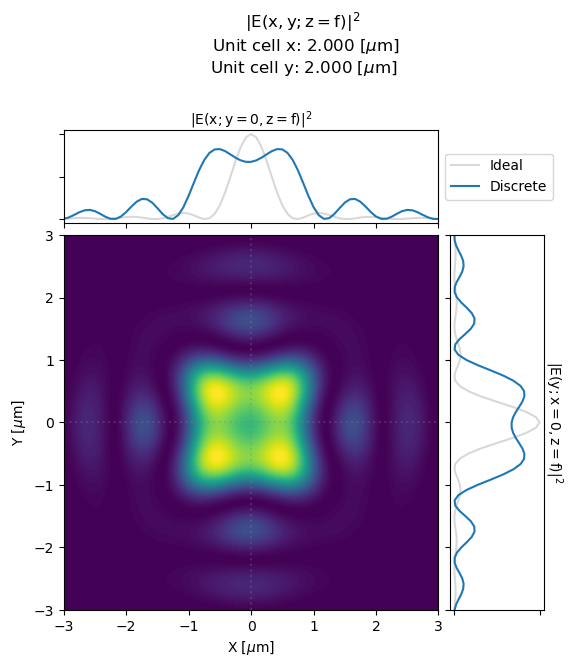

In [20]:
# Plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
xlim = 3  # [um]
ylim = 3  # [um]

# Contourf plot
ax_contourf = fig.add_subplot(gs[1, 0])
x_0 = int(len(X)/2)
y_0 = int(len(Y)/2)
extent = [-xlim, xlim, -ylim, ylim]  # Set the extent based on xlim and ylim
ax_contourf.contourf(X*1e6, Y*1e6, np.abs(Efield_meta)**2/np.max(np.abs(Efield_meta)**2), levels=100, extent=extent)
ax_contourf.set_xlabel('X [$\mu$m]')
ax_contourf.set_ylabel('Y [$\mu$m]')
ax_contourf.set_aspect(1)
# ax_contourf.set_title('E(x,y;z = f)')
ax_contourf.axhline(Lx/len(X)*x_0, linestyle=':', color='grey', alpha=0.3)
ax_contourf.axvline(Ly/len(Y)*y_0, linestyle=':', color='grey', alpha=0.3)
ax_contourf.set_xlim(-xlim, xlim)
ax_contourf.set_ylim(-ylim, ylim)

# Plot of Uniform phase field along x-axis
ax_x_field = fig.add_subplot(gs[0,0], sharex=ax_contourf)
X_cut = X[x_0, :]
E_cut_x = Efield[x_0]
ax_x_field.plot(X_cut*1e6, np.abs(E_cut_x)**2/np.max(np.abs(Efield)**2),alpha=0.3,color='grey',label='Ideal')
ax_x_field.set_xlabel('$|\mathrm{E(x;y=0,z=f)}|^2~$')
# ax_x_field.set_title('$|\mathrm{E(x;y=0,z=f)}|^2~$')
ax_x_field.set_xlim(-xlim, xlim)
# ax_x_field.axis('off')
ax_x_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_x_field.xaxis.set_label_position("top")

# Plot of Uniform phase field along y-axis
ax_y_field = fig.add_subplot(gs[1,1], sharey=ax_contourf)
Y_cut = Y[:, y_0]
E_cut_y = Efield[:, y_0]
ax_y_field.plot(np.abs(E_cut_y)**2/np.max(np.abs(Efield)**2), Y_cut*1e6,alpha=0.3,color='grey')
ax_y_field.set_ylabel('$|\mathrm{E(y;x=0,z=f)}|^2~$',rotation=-90, labelpad=15)
# ax_y_field.set_title('$|\mathrm{E(y;x=0,z=f)}|^2~$')
ax_y_field.set_ylim(-ylim, ylim)
ax_y_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_y_field.yaxis.set_label_position("right")


#### Plot Meta Lens
# Plot of field along x-axis

X_cut_meta = X[x_0, :]
E_cut_x_meta = Efield_meta[x_0]
ax_x_field.plot(X_cut_meta*1e6, np.abs(E_cut_x_meta)**2/np.max(np.abs(Efield_meta)**2),label='Discrete')
ax_x_field.set_xlabel('$|\mathrm{E(x;y=0,z=f)}|^2~$')
# ax_x_field.set_title('$|\mathrm{E(x;y=0,z=f)}|^2~$')
ax_x_field.set_xlim(-xlim, xlim)
# ax_x_field.axis('off')
ax_x_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_x_field.xaxis.set_label_position("top")
ax_x_field.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plot of field along y-axis
Y_cut_meta = Y[:, y_0]
E_cut_y_meta = Efield_meta[:, y_0]
ax_y_field.plot(np.abs(E_cut_y_meta)**2/np.max(np.abs(Efield_meta)**2), Y_cut_meta*1e6)
ax_y_field.set_ylabel('$|\mathrm{E(y;x=0,z=f)}|^2~$',rotation=-90, labelpad=15)
# ax_y_field.set_title('$|\mathrm{E(y;x=0,z=f)}|^2~$')
ax_y_field.set_ylim(-ylim, ylim)
ax_y_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_y_field.yaxis.set_label_position("right")


plt.suptitle(r'$|\mathrm{E(x,y;z = f)}|^2$ '+'\n Unit cell x: {:.3f} [$\mu$m]\nUnit cell y: {:.3f} [$\mu$m]'.format(Δx*1e6,Δy*1e6),fontsize=12, y=1.1)



Text(0.5, 1.1, '$|\\mathrm{E(x,y;z = f)}|^2$ \n Unit cell x: 0.500 [$\\mu$m]\nUnit cell y: 0.500 [$\\mu$m]')

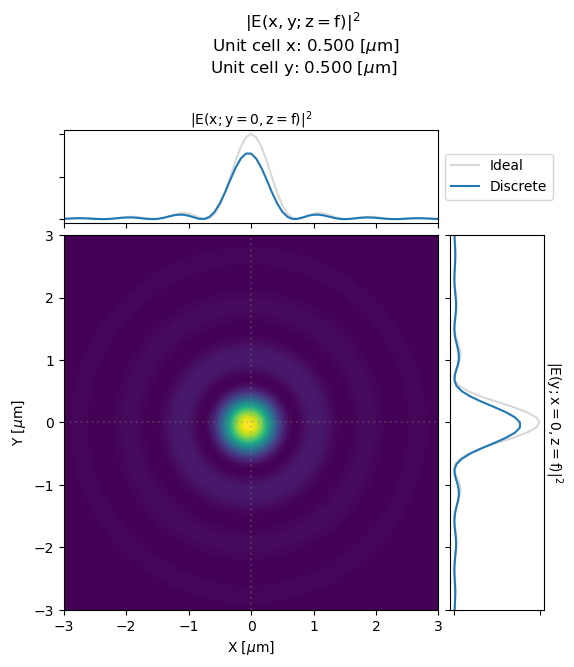

In [21]:
nm = 1e-9
um = 1e-6

λ = 1550*nm
k = 2*np.pi/λ

## Set size of computational domain E-Field 
# Size in x
Lx = 1000*um
# Size in y
Ly = 1000*um


## Set resolution of computational domain
# resolution in x
resX = Lx/12000
# resolution in y
resY = Ly/12000


## Defining Computation Space
x = np.arange(-Lx/2,Lx/2+resX,resX)
y = np.arange(-Ly/2,Ly/2+resY,resY)

X,Y = np.meshgrid(x,y)

## Find Kx and Ky
kx = fftfreq(len(x), np.diff(x)[0])
ky = fftfreq(len(x), np.diff(y)[0])

# Create grids of frequencies
kX, kY = np.meshgrid(kx, ky, indexing='ij')

# Calculate kz
kz = np.sqrt(np.array(k**2 - 4*np.pi**2*(kX**2 + kY**2),dtype='cfloat'))



## Define Focal Length
F = 10*λ


## Stepped Phase Profile
# Choose width in x of step
Δx = 0.5*um
# Choose width in y of step
Δy = 0.5*um
# Build discretised phase profile
ϕ_xy_D = k*(np.sqrt((Δx*np.floor((X+Δx/2)/Δx))**2 + (Δy*np.floor((Y+Δy/2)/Δy))**2 + F**2) - F)
ϕ_xy = k*(np.sqrt(X**2 + Y**2 + F**2) - F)



## Amplitude(x) at z=0
w = 100*um
Gauss = 1*np.exp(-(X**2 + Y**2)/w**2)

## Build the Initial E-Field at z=0
f = np.array(Gauss*np.exp(1j*(-ϕ_xy_D)),dtype='cfloat')

## Propogate field to z = Focal Length
Efield_meta = ifft2(fft2(f) * np.exp(1j*kz*F))


# Plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
xlim = 3  # [um]
ylim = 3  # [um]

# Contourf plot
ax_contourf = fig.add_subplot(gs[1, 0])
x_0 = int(len(X)/2)
y_0 = int(len(Y)/2)
extent = [-xlim, xlim, -ylim, ylim]  # Set the extent based on xlim and ylim
ax_contourf.contourf(X*1e6, Y*1e6, np.abs(Efield_meta)**2/np.max(np.abs(Efield_meta)**2), levels=100, extent=extent)
ax_contourf.set_xlabel('X [$\mu$m]')
ax_contourf.set_ylabel('Y [$\mu$m]')
ax_contourf.set_aspect(1)
# ax_contourf.set_title('E(x,y;z = f)')
ax_contourf.axhline(Lx/len(X)*x_0, linestyle=':', color='grey', alpha=0.3)
ax_contourf.axvline(Ly/len(Y)*y_0, linestyle=':', color='grey', alpha=0.3)
ax_contourf.set_xlim(-xlim, xlim)
ax_contourf.set_ylim(-ylim, ylim)

# Plot of Uniform phase field along x-axis
ax_x_field = fig.add_subplot(gs[0,0], sharex=ax_contourf)
X_cut = X[x_0, :]
E_cut_x = Efield[x_0]
ax_x_field.plot(X_cut*1e6, np.abs(E_cut_x)**2/np.max(np.abs(Efield)**2),alpha=0.3,color='grey',label='Ideal')
ax_x_field.set_xlabel('$|\mathrm{E(x;y=0,z=f)}|^2~$')
# ax_x_field.set_title('$|\mathrm{E(x;y=0,z=f)}|^2~$')
ax_x_field.set_xlim(-xlim, xlim)
# ax_x_field.axis('off')
ax_x_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_x_field.xaxis.set_label_position("top")

# Plot of Uniform phase field along y-axis
ax_y_field = fig.add_subplot(gs[1,1], sharey=ax_contourf)
Y_cut = Y[:, y_0]
E_cut_y = Efield[:, y_0]
ax_y_field.plot(np.abs(E_cut_y)**2/np.max(np.abs(Efield)**2), Y_cut*1e6,alpha=0.3,color='grey')
ax_y_field.set_ylabel('$|\mathrm{E(y;x=0,z=f)}|^2~$',rotation=-90, labelpad=15)
# ax_y_field.set_title('$|\mathrm{E(y;x=0,z=f)}|^2~$')
ax_y_field.set_ylim(-ylim, ylim)
ax_y_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_y_field.yaxis.set_label_position("right")


#### Plot Meta Lens
# Plot of field along x-axis

X_cut_meta = X[x_0, :]
E_cut_x_meta = Efield_meta[x_0]
ax_x_field.plot(X_cut_meta*1e6, np.abs(E_cut_x_meta)**2/np.max(np.abs(Efield)**2),label='Discrete')
ax_x_field.set_xlabel('$|\mathrm{E(x;y=0,z=f)}|^2~$')
# ax_x_field.set_title('$|\mathrm{E(x;y=0,z=f)}|^2~$')
ax_x_field.set_xlim(-xlim, xlim)
# ax_x_field.axis('off')
ax_x_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_x_field.xaxis.set_label_position("top")
ax_x_field.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plot of field along y-axis
Y_cut_meta = Y[:, y_0]
E_cut_y_meta = Efield_meta[:, y_0]
ax_y_field.plot(np.abs(E_cut_y_meta)**2/np.max(np.abs(Efield)**2), Y_cut_meta*1e6)
ax_y_field.set_ylabel('$|\mathrm{E(y;x=0,z=f)}|^2~$',rotation=-90, labelpad=15)
# ax_y_field.set_title('$|\mathrm{E(y;x=0,z=f)}|^2~$')
ax_y_field.set_ylim(-ylim, ylim)
ax_y_field.tick_params(axis='both', labelleft=False, labeltop=False, labelright=False, labelbottom=False)
ax_y_field.yaxis.set_label_position("right")


plt.suptitle(r'$|\mathrm{E(x,y;z = f)}|^2$ '+'\n Unit cell x: {:.3f} [$\mu$m]\nUnit cell y: {:.3f} [$\mu$m]'.format(Δx*1e6,Δy*1e6),fontsize=12, y=1.1)


Text(0.5, 0.92, '$|\\mathrm{E(x,y;z = f)}|^2~$')

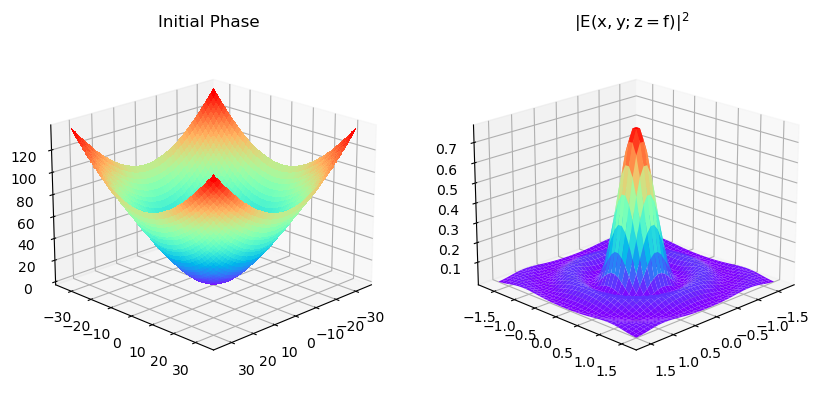

In [22]:
fig, axs = plt.subplots(1,2,subplot_kw={"projection": "3d"}, figsize = (10,15))

cut = 20
x_l, x_h = int(len(X)/2-cut), int(len(X)/2+cut)
y_l, y_h = int(len(Y)/2-cut), int(len(Y)/2+cut)
X_cut = X[x_l:x_h,x_l:x_h]
Y_cut = Y[y_l:y_h,y_l:y_h]
E_cut = Efield_meta[x_l:x_h,y_l:y_h]

cut2 = 400
x_l2, x_h2 = int(len(X)/2-cut2), int(len(X)/2+cut2)
y_l2, y_h2 = int(len(Y)/2-cut2), int(len(Y)/2+cut2)
X_cut2 = X[x_l2:x_h2,x_l2:x_h2]
Y_cut2 = Y[y_l2:y_h2,y_l2:y_h2]
ϕ_xy_cut = ϕ_xy[x_l2:x_h2,y_l2:y_h2]
ϕ_xy_D_cut = ϕ_xy_D[x_l2:x_h2,y_l2:y_h2]



axs[0].view_init(azim=45, elev=20)
# surf = axs[0].plot_surface(X*1e6,Y*1e6,ϕ_xy,antialiased=True,linewidth=0 ,cmap=cm.rainbow)
# surf = axs[0].plot_surface(X*1e6,Y*1e6,ϕ_xy_D,antialiased=True,linewidth=0 ,cmap=cm.rainbow)

# surf = axs[0].plot_surface(X_cut2*1e6,Y_cut2*1e6,ϕ_xy_cut,antialiased=True,linewidth=0,alpha=0.2)
surf = axs[0].plot_surface(X_cut2*1e6,Y_cut2*1e6,ϕ_xy_D_cut,antialiased=False,linewidth=0 ,cmap=cm.rainbow)

axs[1].view_init(azim=45, elev=20)


surf = axs[1].plot_surface(X_cut*1e6,Y_cut*1e6,np.abs(E_cut)**2/np.max(np.abs(Efield)**2),antialiased=True,linewidth=30 ,cmap=cm.rainbow)


axs[0].set_title('Initial Phase')
axs[1].set_title('$|\mathrm{E(x,y;z = f)}|^2~$'+'')


Text(0.5, 1.1, '$|\\mathrm{E(x,y;z = f)}|^2$ \n Unit cell x: 0.500 [$\\mu$m]\nUnit cell y: 0.500 [$\\mu$m]')

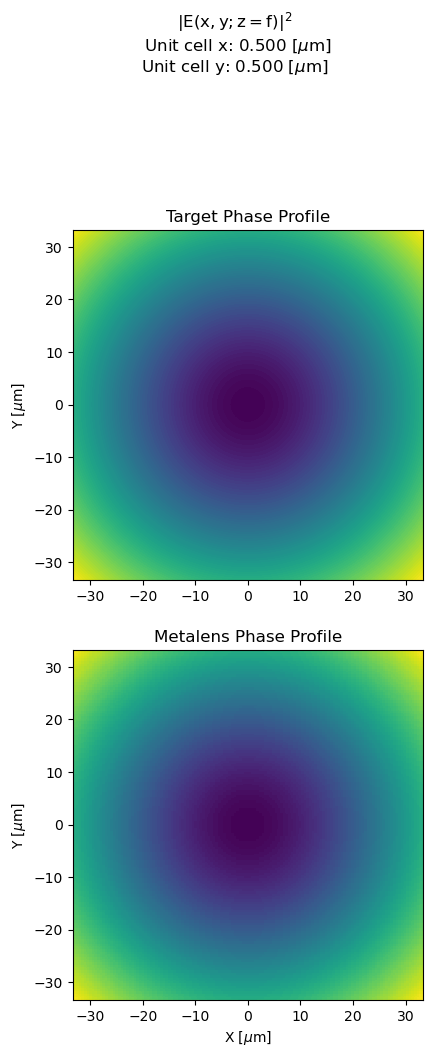

In [23]:
# Plot
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10))
ax1.contourf(X_cut2*1e6,Y_cut2*1e6,ϕ_xy_cut, levels = 100)
# ax1.set_xlabel('X [$\mu$m]')
ax1.set_ylabel('Y [$\mu$m]')
ax1.set_aspect(1)
ax1.set_title('Target Phase Profile')

ax2.contourf(X_cut2*1e6,Y_cut2*1e6,ϕ_xy_D_cut, levels = 100)
ax2.set_xlabel('X [$\mu$m]')
ax2.set_ylabel('Y [$\mu$m]')
ax2.set_aspect(1)
ax2.set_title('Metalens Phase Profile')

plt.suptitle(r'$|\mathrm{E(x,y;z = f)}|^2$ '+'\n Unit cell x: {:.3f} [$\mu$m]\nUnit cell y: {:.3f} [$\mu$m]'.format(Δx*1e6,Δy*1e6),fontsize=12, y=1.1)
